In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import glob, os, re
import xarray as xr
from  imblearn.ensemble import *
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

from sklearn.metrics import confusion_matrix,make_scorer
from collections import Counter
import pydotplus
# from sklearn.datasets import load_iris
from sklearn import tree
#from getData import get_test_data,get_train_data,get_val_data
#from resultAnalysis import get_fault_instance,model_scores,all_datas
#from  trail import all_datas,model_scores,get_fault_instance
os.chdir('/home/ytikewk/python_project/daisee_detect')

In [3]:
# %%
def make_2Label(label):
    l2 = np.zeros(len(label))
    for i in range(len(label)):
        if label[i] > 1:
            l2[i] = 1
        else:
            l2[i] = 0

    return l2


In [4]:
# get label
label4 = np.load('/home/ytikewk/python_project/daisee_detect/selected4pData_target.npy')
label2= make_2Label(label4)
print(Counter(label4))
print(Counter(label2))

Counter({2: 4421, 3: 3984, 1: 455, 0: 61})
Counter({1.0: 8405, 0.0: 516})


In [5]:
# %% 19.00 in 14/8
# this data including 20 openpose point, openface,
# face landmark (different part shape,location)
data = pd.read_csv('/home/ytikewk/python_project/daisee_detect/dataprocess/finall_process.csv',index_col=0)
full_data = data
full_label = label2

In [6]:
# %%
X_train,X_test,y_train,y_test = train_test_split(full_data,label4,test_size=0.25)

# os.chdir('/media/ytikewk/76627FE2627FA591/dataset/DAiSEE/DAiSEE/tree_png')
print(Counter(y_test))
print(Counter(y_train))

Counter({2: 1116, 3: 987, 1: 109, 0: 19})
Counter({2: 3305, 3: 2997, 1: 346, 0: 42})


In [7]:
brf = BalancedRandomForestClassifier(n_jobs=5)
brf.fit(X_train,y_train)
predict_brf = brf.predict(X_test)
predict_prob_brf = brf.predict_proba(X_test)
print(confusion_matrix(y_test,predict_brf))
# score_disengage(y_test,predict_brf)

[[  8   6   2   3]
 [ 22  41  20  26]
 [151 226 311 428]
 [ 81 181 235 490]]


NameError: name 'score_disengage' is not defined

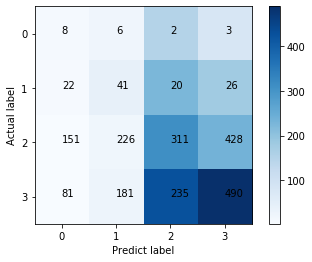

In [10]:

from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt
 
guess = predict_brf
fact = y_test
classes = list(set(fact))
classes.sort()
confusion = confusion_matrix(guess, fact)
plt.imshow(confusion, cmap=plt.cm.Blues)
indices = range(len(confusion))
plt.xticks(indices, classes)
plt.yticks(indices, classes)
plt.colorbar()
plt.xlabel('Predict label')
plt.ylabel('Actual label')
for first_index in range(len(confusion)):
    for second_index in range(len(confusion[first_index])):
        plt.text(first_index, second_index, confusion[first_index][second_index])
 
# plt.show()
plt.savefig('/home/ytikewk/python_project/daisee_detect/figures/4levelConfusionMat')

In [11]:
# %%
X_train,X_test,y_train,y_test = train_test_split(full_data,label2,test_size=0.25)

# os.chdir('/media/ytikewk/76627FE2627FA591/dataset/DAiSEE/DAiSEE/tree_png')
print(Counter(y_test))
print(Counter(y_train))

Counter({1.0: 2110, 0.0: 121})
Counter({1.0: 6295, 0.0: 395})


In [12]:
brf = BalancedRandomForestClassifier(n_jobs=5)
brf.fit(X_train,y_train)
predict_brf = brf.predict(X_test)
predict_prob_brf = brf.predict_proba(X_test)
print(confusion_matrix(y_test,predict_brf))
# score_disengage(y_test,predict_brf)

[[  93   28]
 [ 701 1409]]


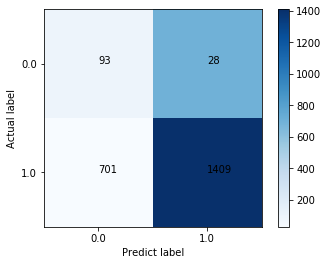

In [14]:

from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt
 
guess = predict_brf
fact = y_test
classes = list(set(fact))
classes.sort()
confusion = confusion_matrix(guess, fact)
plt.imshow(confusion, cmap=plt.cm.Blues)
indices = range(len(confusion))
plt.xticks(indices, classes)
plt.yticks(indices, classes)
plt.colorbar()
plt.xlabel('Predict label')
plt.ylabel('Actual label')
for first_index in range(len(confusion)):
    for second_index in range(len(confusion[first_index])):
        plt.text(first_index, second_index, confusion[first_index][second_index])
 
# plt.show()
plt.savefig('/home/ytikewk/python_project/daisee_detect/figures/2levelConfusionMat')